# Source of the Dataset

 - https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

In [1]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
# read the dataset 

df = pd.read_csv('../Datasets/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  age  has  41  unique values
Feature  sex  has  2  unique values ---->  [1 0]
Feature  cp  has  4  unique values ---->  [3 2 1 0]
Feature  trestbps  has  49  unique values
Feature  chol  has  152  unique values
Feature  fbs  has  2  unique values ---->  [1 0]
Feature  restecg  has  3  unique values ---->  [0 1 2]
Feature  thalach  has  91  unique values
Feature  exang  has  2  unique values ---->  [0 1]
Feature  oldpeak  has  40  unique values
Feature  slope  has  3  unique values ---->  [0 2 1]
Feature  ca  has  5  unique values ---->  [0 2 1 3 4]
Feature  thal  has  4  unique values ---->  [1 2 3 0]
Feature  target  has  2  unique values ---->  [1 0]


In [4]:
cat_features = ["cp", "restecg", "thal"]

# Data Pre-processing Phase

In [5]:
## checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(302, 14)


In [7]:
# Convert Catergorical values to numeric representation

df['cp'].replace({0:'A', 1:'B', 2:'C', 3:'D'}, inplace = True)
df['restecg'].replace({0:"P", 1:"Q", 2:"R"}, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,D,145,233,1,P,150,0,2.3,0,0,1,1
1,37,1,C,130,250,0,Q,187,0,3.5,0,0,2,1
2,41,0,B,130,204,0,P,172,0,1.4,2,0,2,1
3,56,1,B,120,236,0,Q,178,0,0.8,2,0,2,1
4,57,0,A,120,354,0,Q,163,1,0.6,2,0,2,1


In [8]:
# let's investigate the 'thal' feature

df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [9]:
df.index[df['thal']==0].tolist()

[48, 281]

In [10]:
df.drop(index = [48, 281], inplace = True)

In [11]:
df['thal'].value_counts()


2    165
3    117
1     18
Name: thal, dtype: int64

In [12]:
print(df.shape)

(300, 14)


In [13]:
df['thal'].replace({1:"fixed defect", 2:"reversible defect", 3:"Three"}, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,D,145,233,1,P,150,0,2.3,0,0,fixed defect,1
1,37,1,C,130,250,0,Q,187,0,3.5,0,0,reversible defect,1
2,41,0,B,130,204,0,P,172,0,1.4,2,0,reversible defect,1
3,56,1,B,120,236,0,Q,178,0,0.8,2,0,reversible defect,1
4,57,0,A,120,354,0,Q,163,1,0.6,2,0,reversible defect,1


In [14]:
df = pd.get_dummies(data = df, columns = cat_features)

In [15]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,1,1,0,0,0,1,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,1,0,0,1,0,0,0,1
2,41,0,130,204,0,172,0,1.4,2,0,...,0,1,0,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,2,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,2,0,...,1,0,0,0,0,1,0,0,0,1


# Feature Scaling

In [16]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,131.626667,246.743333,0.146667,149.663333,0.326667,1.046667,1.396667,0.723333,...,0.473333,0.166667,0.283333,0.076667,0.486667,0.500000,0.013333,0.390000,0.060000,0.550000
std,9.076720,0.465953,17.619557,51.837514,0.354364,22.889658,0.469778,1.163760,0.616920,1.008387,...,0.500123,0.373301,0.451370,0.266506,0.500657,0.500835,0.114889,0.488565,0.237884,0.498325
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,120.000000,211.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.500000,0.000000,152.500000,0.000000,0.800000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X = df.drop(columns = 'target') # X contains the features 
y= df['target']
print(X.shape)
X.head()

(300, 20)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
0,63,1,145,233,1,150,0,2.3,0,0,0,0,0,1,1,0,0,0,1,0
1,37,1,130,250,0,187,0,3.5,0,0,0,0,1,0,0,1,0,0,0,1
2,41,0,130,204,0,172,0,1.4,2,0,0,1,0,0,1,0,0,0,0,1
3,56,1,120,236,0,178,0,0.8,2,0,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,0,1,0,0,0,1


In [18]:
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,0.683333,131.626667,246.743333,0.146667,149.663333,0.326667,1.046667,1.396667,0.723333,0.473333,0.166667,0.283333,0.076667,0.486667,0.500000,0.013333,0.390000,0.060000,0.550000
std,9.076720,0.465953,17.619557,51.837514,0.354364,22.889658,0.469778,1.163760,0.616920,1.008387,0.500123,0.373301,0.451370,0.266506,0.500657,0.500835,0.114889,0.488565,0.237884,0.498325
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,120.000000,211.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.500000,0.000000,152.500000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(240, 20)
(60, 20)


In [21]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [22]:
X_test.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
213,0.680851,0,0.481132,0.406467,0,0.572519,1,0.161290,0.5,0.00,1,0,0,0,1,0,0,1,0,0
300,0.829787,1,0.471698,0.143187,1,0.534351,0,0.548387,0.5,0.50,1,0,0,0,0,1,0,1,0,0
28,0.765957,0,0.433962,0.660508,1,0.656489,0,0.129032,1.0,0.25,0,0,1,0,1,0,0,0,0,1
288,0.595745,1,0.150943,0.471132,0,0.549618,1,0.483871,0.5,0.25,1,0,0,0,0,1,0,1,0,0
133,0.255319,1,0.150943,0.240185,0,0.625954,0,0.000000,1.0,0.00,0,1,0,0,0,1,0,0,0,1


# Feature Selection

1. We will see if there exists any features with zero variance ---> if there is , we should drop
2. We will use Pearson's correlation coefficient to drop redundant features

In [23]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_A,cp_B,cp_C,cp_D,restecg_P,restecg_Q,restecg_R,thal_Three,thal_fixed defect,thal_reversible defect
208,0.425532,1,0.245283,0.131640,0,0.519084,0,0.322581,0.5,0.75,0,0,1,0,0,1,0,1,0,0
92,0.489362,1,0.415094,0.212471,0,0.748092,0,0.000000,1.0,1.00,0,0,1,0,0,1,0,0,0,1
234,0.872340,1,0.339623,0.441109,0,0.290076,0,0.387097,0.5,0.75,1,0,0,0,1,0,0,0,0,1
13,0.744681,1,0.150943,0.184758,0,0.557252,1,0.290323,0.5,0.00,0,0,0,1,1,0,0,0,0,1
23,0.680851,1,0.528302,0.258661,1,0.503817,1,0.161290,0.5,0.00,0,0,1,0,0,1,0,0,0,1


In [24]:
featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
featuresWithZeroVariance

[]

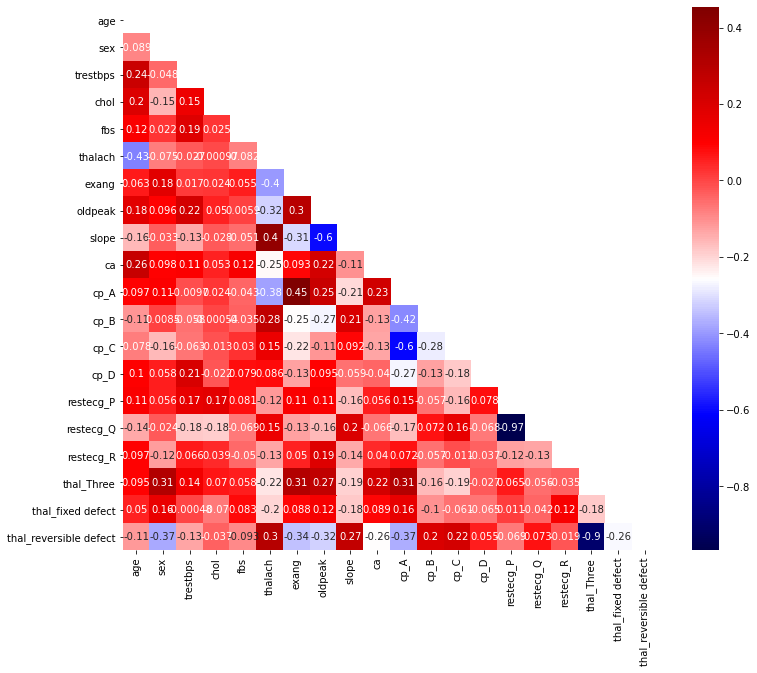

In [25]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

2
{'restecg_Q', 'thal_reversible defect'}


In [28]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(240, 18)
(60, 18)


# Model Creation and Evaluation

In [29]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.5458333333333333
Test Accuracy:  0.5333333333333333


Depth =  2 , Training Accuracy =  0.7791666666666667 , Test Accuracy =  0.8 , Diff =  2.083333333333337  %
Depth =  3 , Training Accuracy =  0.8625 , Test Accuracy =  0.85 , Diff =  1.2500000000000067  %
Depth =  4 , Training Accuracy =  0.8833333333333333 , Test Accuracy =  0.8166666666666667 , Diff =  6.666666666666665  %
Depth =  5 , Training Accuracy =  0.9083333333333333 , Test Accuracy =  0.8 , Diff =  10.833333333333329  %
Depth =  6 , Training Accuracy =  0.9375 , Test Accuracy =  0.7333333333333333 , Diff =  20.41666666666667  %
Depth =  7 , Training Accuracy =  0.9666666666666667 , Test Accuracy =  0.7833333333333333 , Diff =  18.333333333333336  %
Depth =  8 , Training Accuracy =  0.9833333333333333 , Test Accuracy =  0.7166666666666667 , Diff =  26.66666666666666  %
Depth =  9 , Training Accuracy =  0.9958333333333333 , Test Accuracy =  0.7333333333333333 , Diff =  26.250000000000007  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.7 , Diff =  30.0000000000000

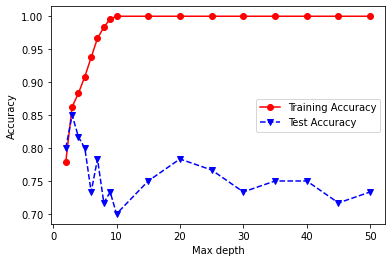

In [30]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [31]:
from sklearn import tree
from sklearn.tree import export_graphviz
#!pip install graphviz

In [32]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [33]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=X_train.columns,    
    class_names=df['target'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
#graph
#Go to https://dreampuf.github.io/GraphvizOnline
# and put the code in tree.dot to visualize the tree

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.6833333333333333 , Difference =  31.666666666666664 %
K =  5 , Training Accuracy =  0.8458333333333333  Test Accuracy =  0.7666666666666667 , Difference =  7.916666666666661 %
K =  10 , Training Accuracy =  0.8166666666666667  Test Accuracy =  0.8 , Difference =  1.6666666666666607 %
K =  15 , Training Accuracy =  0.8333333333333334  Test Accuracy =  0.75 , Difference =  8.333333333333337 %
K =  20 , Training Accuracy =  0.8208333333333333  Test Accuracy =  0.7333333333333333 , Difference =  8.750000000000002 %
K =  25 , Training Accuracy =  0.8166666666666667  Test Accuracy =  0.7666666666666667 , Difference =  4.999999999999993 %
K =  30 , Training Accuracy =  0.8208333333333333  Test Accuracy =  0.75 , Difference =  7.08333333333333 %


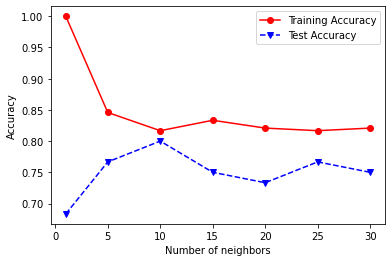

In [34]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.7 , Difference =  30.000000000000004 %
K =  5 , Training Accuracy =  0.8541666666666666  Test Accuracy =  0.7833333333333333 , Difference =  7.08333333333333 %
K =  10 , Training Accuracy =  0.8291666666666667  Test Accuracy =  0.7833333333333333 , Difference =  4.583333333333339 %
K =  15 , Training Accuracy =  0.8375  Test Accuracy =  0.7666666666666667 , Difference =  7.08333333333333 %
K =  20 , Training Accuracy =  0.825  Test Accuracy =  0.7666666666666667 , Difference =  5.833333333333323 %
K =  25 , Training Accuracy =  0.8375  Test Accuracy =  0.7833333333333333 , Difference =  5.41666666666667 %
K =  30 , Training Accuracy =  0.825  Test Accuracy =  0.7833333333333333 , Difference =  4.1666666666666625 %


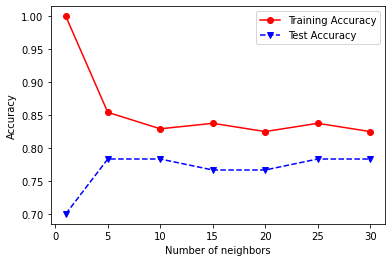

In [35]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [36]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.8708333333333333
Test Accuracy:  0.7833333333333333

Logistic Regression with L2 regularization
Train Accuracy:  0.8625
Test Accuracy:  0.7833333333333333


In [37]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.7375
Test Accuracy:  0.75


In [38]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.8166666666666667
Test Accuracy:  0.75


In [39]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.85
Test Accuracy:  0.7833333333333333


In [40]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[20  8]
 [ 5 27]]

Classification Report
              precision    recall  f1-score   support

           0      0.800     0.714     0.755        28
           1      0.771     0.844     0.806        32

    accuracy                          0.783        60
   macro avg      0.786     0.779     0.780        60
weighted avg      0.785     0.783     0.782        60



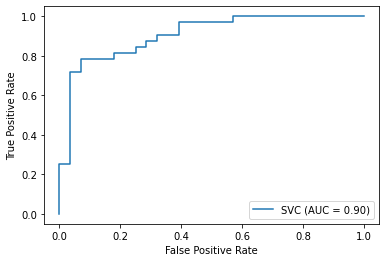

In [41]:
from sklearn.metrics import plot_roc_curve
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test);